# **Customer Churn Prediction using Artificial Neural Networks**

By Radyatra Sidharta

## I. Introduction

### a. Table of Content
- I. Introduction
    - a. Table of Content
    - b. Objective

- II. Library Import

- III. Data Loading

- IV. Exploratory Data Analysis (EDA)
    - a. Dataset Summary
    - b. Features Summary
        - 1. Numerical Features
        - 2. Categorical Features
    - c. Class Balance

- V. Data Preprocessing
    - a. Feature Selection
        - 1. Checking Correlation of Features to Target
        - 2. Checking Multicollinearity between Features
    - b. Splitting Dataset
    - c. Outlier Handling
    - d. Feature Scaling
    - e. Feature Encoding
    - f. Concat Numerical and Categorical Sets
    - g. Class Balancing
    - h. TensorFlow Pipeline
        - 1. Sequential API
        - 2. Functional API

- VI. Model Definition
    - a. Sequential API
    - b. Functional API

- VII. Model Training
    - a. Sequential API
    - b. Functional API

- VIII. Model Evaluation
    - a. Sequential API
    - b. Functional API

- IX. Model Improvement
    - a. Model Definition
        - 1. Sequential API
        - 2. Functional API
    - b. Model Training
        - 1. Sequential API
        - 2. Functional API
    - c. Model Evaluation
        - 1. Sequential API
        - 2. Functional API
- X. Model Inference
- XI. Model Saving
- XII. Conclusion

### b. Objectives

Create an Artificial Neural Network model to predict customer churn.

## II. Library Import

In [79]:
# Define Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import phik
import pickle
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

# For EDA
from statistics import mode

# For Feature Selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# For Data Balancing
from imblearn.over_sampling import SMOTENC

# For Feature Encoding
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler,OrdinalEncoder

# Handling Outlier
from feature_engine.outliers import Winsorizer

# For Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# For Principal Component Analysis
from sklearn.decomposition import PCA

# For Pipeline
from sklearn.pipeline import Pipeline, make_pipeline

# For Model
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

# Calculate the Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Split between Train-Set and Test-Set
from sklearn.model_selection import train_test_split

# To Evaluate and Improve Models
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, roc_auc_score, roc_curve,precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

np.random.seed(20)
tf.random.set_seed(20)

## III. Data Loading

In [80]:
# Loading the csv file using pd.read.
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The dataset above pertains information on the services customers in Telco subscribe to, as well as their personal information. These attributes are used to classify whether or not a customer will churn in a future time-period. This column "Churn" will henceforth be called "Target", whilst other columns affecting it will henceforth be called "Features." Our target is binary, meaning that it can only have one of two outputs: "No" or "Yes." Other details will be discussed in further chapters.

## IV. Exploratory Data Analysis (EDA)

The first step into identifying the condition and trends of our dataset is by going through the Exploratory Data Analysis (EDA). Here, several assumptions can be made about the dataset and used to simplify the Data Preprocessing ahead. Steps done in the EDA process will refrain from manipulating the dataset and will focus on visualizing its original form as much as possible.

### a. Dataset Summary

In [81]:
# Identifying types of data for each column in our dataset.
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can ascertain that we have different types of features, some that are numerical in form, and others non-numerical. These features may need to be seperated during the Data Preprocessing process for they will need specific conversion procedures before being inputted into the model (details discussed later on).

In [82]:
# Finding NaNs (Not a Number) / Nulls (Zeros) in our data.
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Here, we can summarize that there are no NaNs / Nulls in our dataset which could effect the model performance / model as a whole. However, using the syntax above is not enough to detect anomalies in our data. For example, the syntax ".isnull()" would only detect entries that are "NaN" or "0" in form. Therefore, we would need to use other methods to conclude whether or not our data contains any unneeded values.

In [83]:
# Detecting other forms of anomalies in our dataset.
anomalous_entries = {}

for x in list(df.columns):
    anomalous_entries[x] = 0
    for y in df[x]:
        if y in ['N/A', '--', '-', 'Null', '?', ' ']: # These are the specific NaN values we will be sweeping for.
            anomalous_entries[x] = anomalous_entries[x] + 1

anomalous_entries

{'customerID': 0,
 'gender': 0,
 'SeniorCitizen': 0,
 'Partner': 0,
 'Dependents': 0,
 'tenure': 0,
 'PhoneService': 0,
 'MultipleLines': 0,
 'InternetService': 0,
 'OnlineSecurity': 0,
 'OnlineBackup': 0,
 'DeviceProtection': 0,
 'TechSupport': 0,
 'StreamingTV': 0,
 'StreamingMovies': 0,
 'Contract': 0,
 'PaperlessBilling': 0,
 'PaymentMethod': 0,
 'MonthlyCharges': 0,
 'TotalCharges': 11,
 'Churn': 0}

As we can see above, there are 11 anomalous values in the feature "TotalCharges." However, from the syntax above, we are unable to ascertain which type of NaNs they are. Therefore, we would need to look at it with more specifically.

In [84]:
# Detecting "N/A" in the feature "TotalCharges."
df.loc[df['TotalCharges'] == 'N/A'].count()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [85]:
# Detecting "-" in the feature "TotalCharges."
df.loc[df['TotalCharges'] == '-'].count()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [86]:
# Detecting "?" in the feature "TotalCharges."
df.loc[df['TotalCharges'] == '?'].count()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [87]:
# Detecting any empty spaces in the feature "TotalCharges."
df.loc[df['TotalCharges'] == ' '].count()

customerID          11
gender              11
SeniorCitizen       11
Partner             11
Dependents          11
tenure              11
PhoneService        11
MultipleLines       11
InternetService     11
OnlineSecurity      11
OnlineBackup        11
DeviceProtection    11
TechSupport         11
StreamingTV         11
StreamingMovies     11
Contract            11
PaperlessBilling    11
PaymentMethod       11
MonthlyCharges      11
TotalCharges        11
Churn               11
dtype: int64

From what we gather above, we could ascertain that there are 11 entries in the feature "TotalCharges" that are just empty spaces. We will remove these entries after checking the dataset for duplicates.

In [88]:
# Finding duplicates in our data.
df_dupl = df.duplicated()
df_dupl.sort_values(ascending=False) 

0       False
4691    False
4702    False
4701    False
4700    False
        ...  
2344    False
2343    False
2342    False
2341    False
7042    False
Length: 7043, dtype: bool

According to the information above, there are no duplicates in our dataset. Duplicates are a nuisance for our models since it is just noise and creates larger error margins.

We will now be removing the empty spaces in our feature "TotalCharges."

In [89]:
# Removing empty spaces in the feature "TotalCharges."
df.shape

(7043, 21)

In [91]:
# Retaining dataset that are without the empty spaces in the Total Charges feature.
df1 = df.loc[df['TotalCharges'] == ' ']
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

From what we can gather, we could also understand that the feature "TotalCharges" is in string (or non-numerical) form even though its entries are numbers. Therefore, we will be converting these entries into numerical form. These entries will be converted to float since they are not round numbers.

In [15]:
# Converting string values to float.
df1['TotalCharges'] = df1['TotalCharges'].astype(float)

In [16]:
# Reconfirming whether or not "TotalCharges" has been successfully converted to float type.
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

With that, we have successfully converted the feature "TotalCharges" into float type.

### b. Features Summary

The features summary will discuss how many of our data falls upon a certain class in our target. Here, we have two classes: Class 0 and Class 1, where Class 0 denotes target output of "No" and Class 1 denotes target output of "Yes."

In [17]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### 1. Numerical Features

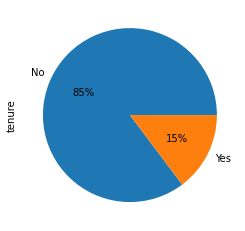

In [18]:
fig, ax = plt.subplots()
df1.groupby('Churn')['tenure'].sum().plot(kind='pie', y='Class', autopct='%1.0f%%')
fig.patch.set_facecolor('xkcd:white')

For the feature "Tenure", we can ascertain that 85% of the entries are categorized as customers that do not churn, whilst 15% are.

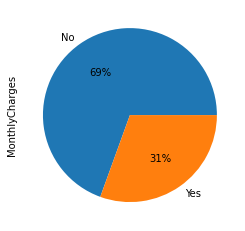

In [19]:
fig, ax = plt.subplots()
df1.groupby('Churn')['MonthlyCharges'].sum().plot(kind='pie', y='Class', autopct='%1.0f%%', ax=ax)
fig.patch.set_facecolor('xkcd:white')

For the feature "MonthlyCharges", 69% of the data entries are categorized as customers who do not churn, as opposed to the 31% who churn.

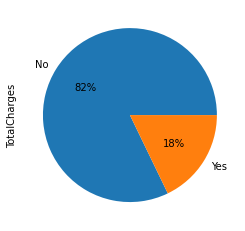

In [20]:
fig, ax = plt.subplots()
df1.groupby('Churn')['TotalCharges'].sum().plot(kind='pie', y='Class', autopct='%1.0f%%')
fig.patch.set_facecolor('xkcd:white')

The feature "TotalCharges" have 82% of its entries where the customers do not churn, whilst 18% churn.

#### 2. Categorical Features

We now move on to check the count on which class our categorical features lie on.

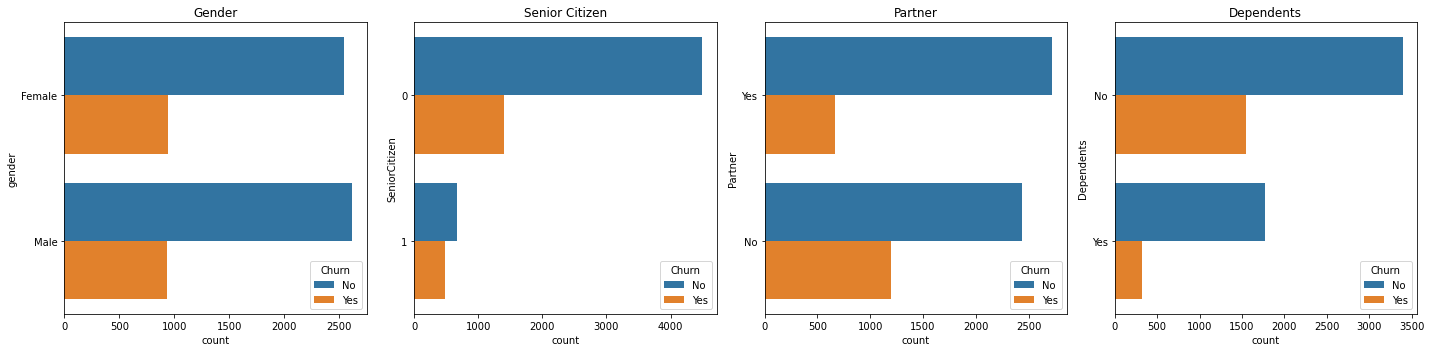

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.countplot(hue = 'Churn', y = 'gender', data=df1, palette="tab10")
plt.title('Gender')

plt.subplot(1,4,2)
sns.countplot(hue = 'Churn', y = 'SeniorCitizen', data=df1, palette="tab10")
plt.title('Senior Citizen')

plt.subplot(1,4,3)
sns.countplot(hue = 'Churn', y = 'Partner', data=df1, palette="tab10")
plt.title('Partner')

plt.subplot(1,4,4)
sns.countplot(hue = 'Churn', y = 'Dependents', data=df1, palette="tab10")
plt.title('Dependents')

plt.tight_layout()

plt.show()

Summary:
- For Gender, we can observe that males are more susceptible to churning and not churning. The data count is similar.
- For the classification of Senior Citizen, we can see that non-senior citizens are more susceptible to churning and not churning. However, the dataset contains more data on non-senior citizens than seniors.
- For the Partner classification, we can see that those without a partner are more susceptible to churning, whilst those who have a partner are more susceptible to not churning.
- For the Dependents classification, here we can observe that customers who are not financially dependent are more susceptible to churning and not churning. 

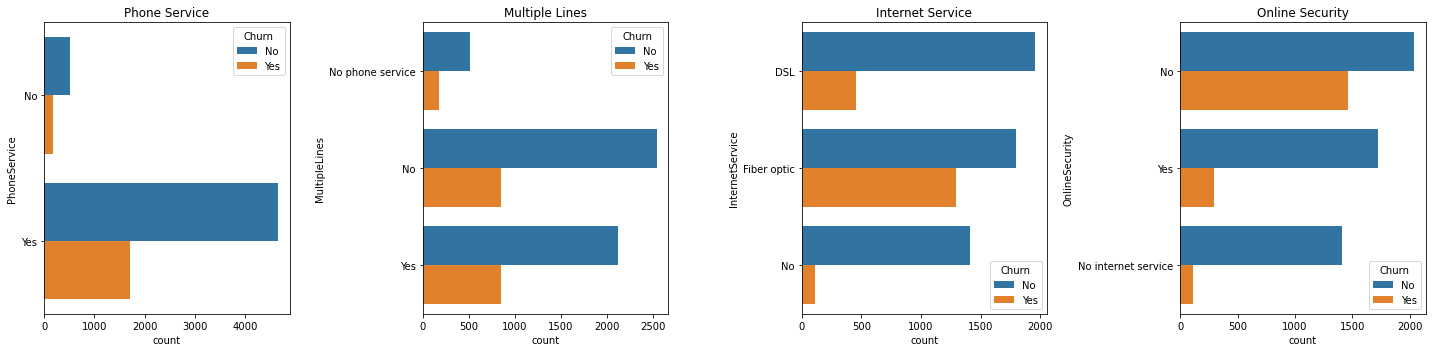

In [22]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.countplot(hue = 'Churn', y = 'PhoneService', data=df1, palette="tab10")
plt.title('Phone Service')

plt.subplot(1,4,2)
sns.countplot(hue = 'Churn', y = 'MultipleLines', data=df1, palette="tab10")
plt.title('Multiple Lines')

plt.subplot(1,4,3)
sns.countplot(hue = 'Churn', y = 'InternetService', data=df1, palette="tab10")
plt.title('Internet Service')

plt.subplot(1,4,4)
sns.countplot(hue = 'Churn', y = 'OnlineSecurity', data=df1, palette="tab10")
plt.title('Online Security')

plt.tight_layout()

plt.show()

- For the Phone Service classification, we can ascertain that those with phone service are more susceptible to churning and not churning.
- For the Multiple Lines classification, we can see that those with no multiple lines are more susceptible to churning and not churning.
- For the Internet Service classification, we can understand that those with Fiber Optic service are more susceptible to churning, whilst those who use a DSL service are more susceptible to not churning.
- For the Online Security classification, we can observe that customers who have no online security are more susceptible to churning and not churning. 

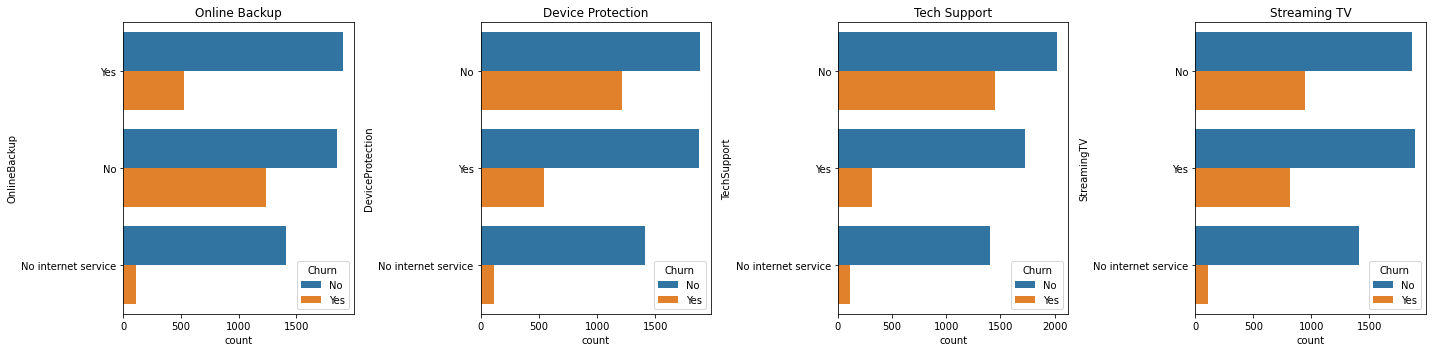

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.countplot(hue = 'Churn', y = 'OnlineBackup', data=df1, palette="tab10")
plt.title('Online Backup')

plt.subplot(1,4,2)
sns.countplot(hue = 'Churn', y = 'DeviceProtection', data=df1, palette="tab10")
plt.title('Device Protection')

plt.subplot(1,4,3)
sns.countplot(hue = 'Churn', y = 'TechSupport', data=df1, palette="tab10")
plt.title('Tech Support')

plt.subplot(1,4,4)
sns.countplot(hue = 'Churn', y = 'StreamingTV', data=df1, palette="tab10")
plt.title('Streaming TV')

plt.tight_layout()

plt.show()

- For the Online Backup classification, we can ascertain that those without Online Backup are more susceptible to churning, whilst those with it are not.
- For the Device Protection classification, we can see that those with no protection are more susceptible to churning and not churning.
- For the Tech Support classification, we can understand that those without such service are more susceptible to churning and not churning.
- For the Streaming TV classification, we can observe that customers who stream and do not stream tv are security are not susceptible to churning, with those who do not stream more susceptible to churning. 

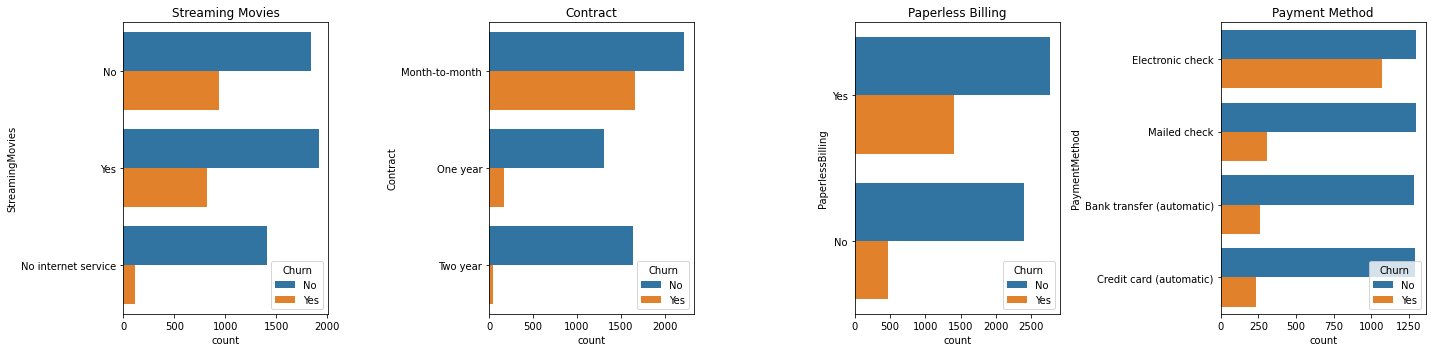

In [24]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.countplot(hue = 'Churn', y = 'StreamingMovies', data=df1, palette="tab10")
plt.title('Streaming Movies')

plt.subplot(1,4,2)
sns.countplot(hue = 'Churn', y = 'Contract', data=df1, palette="tab10")
plt.title('Contract')

plt.subplot(1,4,3)
sns.countplot(hue = 'Churn', y = 'PaperlessBilling', data=df1, palette="tab10")
plt.title('Paperless Billing')

plt.subplot(1,4,4)
sns.countplot(hue = 'Churn', y = 'PaymentMethod', data=df1, palette="tab10")
plt.title('Payment Method')

plt.tight_layout()

plt.show()

- For the Streaming Movies classification, we can ascertain that those who do not stream are more susceptible to churning, whilst those who do are not.
- For the Contract classification, we can see that those with month-to-month contracts are more susceptible to churning and not churning.
- For the Paperless Billing classification, we can understand that those who use paperless billing are more susceptible to churning and not churning.
- For the Payment Method classification, we can observe that all categories have most customer count who do not churn, whilst only Electronic Check have most customers who are susceptible to churning.

Overall, all our customers are not susceptible to churning in any category they fall into.

### c. Class Balance

Class Balance:  No     5163
Yes    1869
Name: Churn, dtype: int64


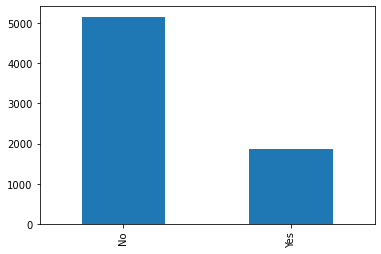

In [25]:
df1['Churn'].value_counts().plot(kind='bar')
print("Class Balance: ", df1['Churn'].value_counts())

In [26]:
print(1869/(5163+1869)*100, '%')

26.578498293515356 %


The graph above describes that there is a Class Imbalance in the target of our dataset, where data entries for "No" is counted at 5163, whilst data entries for "Yes" is counted at only 1869. 

Data Imbalance Interpretation:

- Ratio of 20 - 40% = Mild Imbalance 

- Ratio of 1 - 20% = Moderate Imbalance

- Ratio of Below 1% = Extreme Imbalance

Reference: https://bit.ly/3E2twQd

In our case, the data entries for those with target outcome "Yes" (or Class 1) is only 26.57% of the dataset as a whole. Therefore, there is a mild imbalance in our data.

## V. Data Preprocessing

In [27]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### a. Feature Selection

Feature selection is mainly used as a neccesary step to reduce model training time and computer resource by limiting the features inputted into the model. In cases where features are low in number, this step is may be unnecessary. However, in large feature count cases, we may have to go through feature selection in accordance with the specific objective of the model creation.

In [28]:
# Defining new dataset in which only certain features and our target is retained.
df2 = df1.drop(['customerID'], axis=1) 

#### 1. Correlation

The first step in the feature selection will be to finding the correlation magnitude of our features to the target. Here, we will be using the K-Feature Value Chi-Square test and the Phik Matrix to do so. For the K-Feature Value test, we will be splitting the numerical and categorical data since the latter needs to be encoded beforehand.

In [29]:
# Splitting features from target "Churn."
df_chiN= df2[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]
df_chiC= df2.drop(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], axis=1) 
df_chiT = df2[['Churn']]

In [30]:
# Staging target from string (non-numerical) form to numerical form for conversion.
df_chiT.loc[df_chiT['Churn']== 'No', 'Churn'] = 0
df_chiT.loc[df_chiT['Churn']== 'Yes', 'Churn'] = 1

In [31]:
# Converting target from string type to integer (numerical) form.
df_chiT['Churn'] = df_chiT['Churn'].astype(int)
df_chiT['Churn'] = df_chiT['Churn'].astype(int)

In [32]:
# K-Feature Values Chi-Square test syntax.
chi_num = SelectKBest(score_func=chi2, k='all')
fit_num = chi_num.fit(df_chiN, df_chiT)
fit_num.scores_

array([1.33482766e+02, 1.63773281e+04, 3.65307468e+03, 6.29630810e+05])

In [33]:
# Rounding of results, which come out as K-Feature values.
np.round_(fit_num.scores_)

array([1.33000e+02, 1.63770e+04, 3.65300e+03, 6.29631e+05])

In [34]:
# Fitting (selecting) the rounded K-Feature values and sorting them.
chi_n = pd.Series((fit_num.scores_))
chi_n.index = df_chiN.columns
chi_n.sort_values(ascending=False)

TotalCharges      629630.810349
tenure             16377.328093
MonthlyCharges      3653.074681
SeniorCitizen        133.482766
dtype: float64

The K-Feature values above only denotes how strongly correlated the features are to the target. As such, we can ascertain that "TotalCharges" has the biggest correlation to our target "Churn." From this test alone, we will not be able to gather which features may be fit for use in our model. We will have to use the Phik Matrix for that.

In [35]:
# Encoder function to tranform categorical data (in string type) to numerical values.
ord = OrdinalEncoder()

# Fitting columns.
ord.fit(df_chiC)

# Transforming columns.
chi_encoded = ord.transform(df_chiC)

In [36]:
# K-Feature Value test for categorical features.
chi_cat = SelectKBest(score_func=chi2, k='all')
fit_cat = chi_cat.fit(chi_encoded, df_chiT)
fit_cat.scores_

array([2.54297062e-01, 8.18577694e+01, 1.31271509e+02, 9.29483891e-02,
       9.73596015e+00, 9.71526930e+00, 5.50437364e+02, 2.29441123e+02,
       1.90688004e+02, 5.22164716e+02, 7.37323437e+00, 8.35762354e+00,
       1.11175905e+03, 1.04979224e+02, 5.92405068e+01])

In [37]:
np.round_(fit_cat.scores_)

array([   0.,   82.,  131.,    0.,   10.,   10.,  550.,  229.,  191.,
        522.,    7.,    8., 1112.,  105.,   59.])

In [38]:
chi_cat = pd.Series((fit_cat.scores_))
chi_cat.index = df_chiC.columns
chi_cat.sort_values(ascending=False)

Contract            1111.759054
OnlineSecurity       550.437364
TechSupport          522.164716
OnlineBackup         229.441123
DeviceProtection     190.688004
Dependents           131.271509
PaperlessBilling     104.979224
Partner               81.857769
PaymentMethod         59.240507
MultipleLines          9.735960
InternetService        9.715269
StreamingMovies        8.357624
StreamingTV            7.373234
gender                 0.254297
PhoneService           0.092948
dtype: float64

The feature "Contract" has the strongest correlation to our target "Churn."

interval columns not set, guessing: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


<AxesSubplot:>

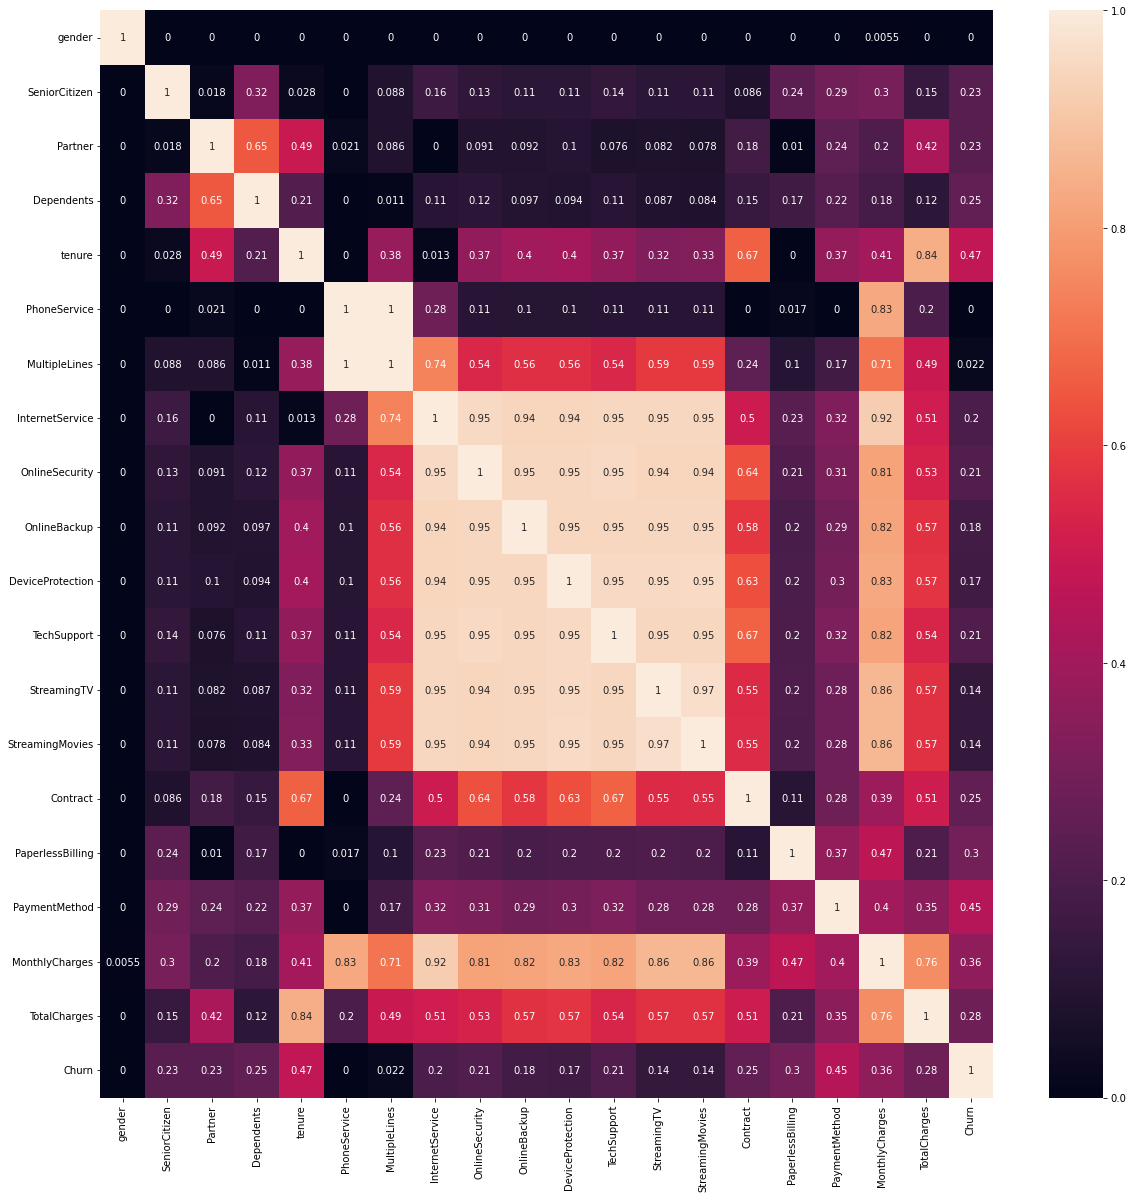

In [39]:
# Spawning of Phik Matrix.
plt.figure(figsize=(20, 20)) # Figure size.
sns.heatmap(df2.phik_matrix(), vmin = 0, vmax = 1, annot = True) # Our range for the correlation coefficient is 0 to 1 (inputted in vmin and vmax).

The Phik Matrix coefficients ranges from 0 - 1, with interpretation shown below:

- Correlation coefficients between 0.9 and 1.0 = Very high correlation
- Correlation coefficients between 0.7 and 0.9 = High correlation
- Correlation coefficients between 0.5 and 0.7 = Moderate correlation
- Correlation coefficients between 0.3 and 0.5 = Low correlation
- Correlation coefficients below 0.3 = Weak to no correlation

Reference: https://bit.ly/3f1UPQh

This means, if our feature has a correlation coefficient of 0.3 or above, we will consider them as feature inputs for our model. However, this does not eliminate the fact that features could be selected based on intuition. As a reminder, this type of feature selection is used solely to reduce training time and computer resource.

As such, we will be assuming a threshold of 0.1, where features with coefficients below it will be dropped.

In [40]:
# Dropping the unused features.
df3 = df2.drop(['gender', 'PhoneService', 'MultipleLines'], axis=1)

#### 2. Multicollinearity

Checking for multicollinearity is optional and does not have significant impact to the classification process.

In [41]:
# Encoding used just for retention of Feature ID / Name.
ord = OrdinalEncoder()

ord.fit(df_chiC[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']])

df_chiC[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']] = ord.transform(df_chiC
 [['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']])

In [42]:
# Converting encoded features to dataframe.
df_chiC = pd.DataFrame(df_chiC)

In [43]:
# Concat numerical and categorical data prior to VIF score test.
chi1 = pd.concat([df_chiN.reset_index(drop=True), df_chiC.reset_index(drop=True)], axis=1)

In [44]:
# Checking Variance Inflation Factor (VIF)
vif_test = chi1
vif_data = pd.DataFrame()
vif_data["Feature"] = vif_test.columns

vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))]
  
print(vif_data)

             Feature        VIF
0      SeniorCitizen   1.369954
1             tenure  15.084412
2     MonthlyCharges  20.503844
3       TotalCharges  13.869098
4             gender   1.954535
5            Partner   2.819229
6         Dependents   1.957360
7       PhoneService  15.150758
8      MultipleLines   2.756988
9    InternetService   4.350001
10    OnlineSecurity   2.247863
11      OnlineBackup   2.455913
12  DeviceProtection   2.629892
13       TechSupport   2.381046
14       StreamingTV   3.237958
15   StreamingMovies   3.265595
16          Contract   4.194484
17  PaperlessBilling   2.875010
18     PaymentMethod   3.095143


The VIF score can be interpreted as the following:

- Where VIF score of 1 denotes no correlation.
- Where VIF score of 1 - 10 denotes moderate correlation.
- Where VIF score of 1 - 10 denotes high correlation.

Reference: https://bit.ly/3f54fdK

In short, we are looking for a VIF score of below 10, which would mean our feature will be considered for use in the model. From the table, we can ascertain that the feature "MonthlyCharges" has the highest VIF score that goes beyond 10. Therefore, we will be drop it and reevaluate the VIF score.

In [45]:
# Dropping "MonthlyCharges."
chi2 = chi1.drop(['MonthlyCharges'], axis=1)

In [46]:
vif_test = chi2
vif_data = pd.DataFrame()
vif_data["Feature"] = vif_test.columns

vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))]
  
print(vif_data)

             Feature        VIF
0      SeniorCitizen   1.343210
1             tenure  13.942277
2       TotalCharges   9.995409
3             gender   1.936952
4            Partner   2.814039
5         Dependents   1.957317
6       PhoneService   8.202506
7      MultipleLines   2.511962
8    InternetService   3.646896
9     OnlineSecurity   2.247428
10      OnlineBackup   2.454485
11  DeviceProtection   2.617893
12       TechSupport   2.380627
13       StreamingTV   3.095955
14   StreamingMovies   3.117757
15          Contract   4.073047
16  PaperlessBilling   2.614613
17     PaymentMethod   3.021672


After dropping "MonthlyCharges" we can still observe that one feature (tenure) has a VIF score of above 10. As such, we will repeat our previous step and drop this feature.

In [47]:
# Dropping "Tenure."
chi3 = chi2.drop(['tenure'], axis=1)

In [48]:
vif_test = chi3 
vif_data = pd.DataFrame()
vif_data["Feature"] = vif_test.columns

vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))]
  
print(vif_data)

             Feature       VIF
0      SeniorCitizen  1.341260
1       TotalCharges  5.316537
2             gender  1.919674
3            Partner  2.749816
4         Dependents  1.955831
5       PhoneService  8.200629
6      MultipleLines  2.499564
7    InternetService  3.491818
8     OnlineSecurity  2.228559
9       OnlineBackup  2.441964
10  DeviceProtection  2.617616
11       TechSupport  2.380037
12       StreamingTV  3.075287
13   StreamingMovies  3.100860
14          Contract  3.014782
15  PaperlessBilling  2.605425
16     PaymentMethod  3.021575


Finally, we can observe that using the features above have a VIF score of below 10. With that, we will be retaining them all.

In [49]:
# Finalizing the features for our dataset.
df4 = df3.drop(['MonthlyCharges', 'tenure'], axis=1)

### b. Splitting Dataset

In [50]:
# Applying the conversion of Churn output from string to integer in our dataset.
df4.loc[df4['Churn']== 'No', 'Churn'] = 0
df4.loc[df4['Churn']== 'Yes', 'Churn'] = 1

In [51]:
# Finalizing conversion.
df4['Churn'] = df4['Churn'].astype(int)
df4['Churn'] = df4['Churn'].astype(int)

In [52]:
# Defining X as our Features and y as our Target "Churn."
X = df4.drop(['Churn'], axis=1) 
y = df4['Churn']

# Splitting dataframe between Train Set and Test Set as well as features and target, stratifying the target to make sure the train and test set receives
# equal amounts of class output.
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, stratify=y, train_size=0.7)

print('X_Train Size : ', X_train_full.shape)
print('X_Test Size  : ', X_test.shape)
print('y_Train Size : ', y_train_full.shape)
print('y_Test Size  : ', y_test.shape)

X_Train Size :  (4922, 14)
X_Test Size  :  (2110, 14)
y_Train Size :  (4922,)
y_Test Size  :  (2110,)


In [53]:
# Resplitting our train set to the final train and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, train_size=0.9)

print('X_Train Size : ', X_train.shape)
print('X_Validation Size  : ', X_val.shape)
print('y_Train Size : ', y_train.shape)
print('y_Validation Size  : ', y_val.shape)

X_Train Size :  (4429, 14)
X_Validation Size  :  (493, 14)
y_Train Size :  (4429,)
y_Validation Size  :  (493,)


In [73]:
X_train.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges'],
      dtype='object')

### c. Outlier Handling

Outlier handling is necessary for our model to perform better. As such we will be doing so to our numerical values.

In [54]:
# Seperating numerical from categorical data.
X_train_num1 = X_train[['SeniorCitizen', 'TotalCharges']]
X_train_cat = X_train.drop(['SeniorCitizen', 'TotalCharges'], axis=1)

In [59]:
# Function to create histogram and boxplot.

def diagnostic_plots(X_train_num1, variable):
    # Defining Figure Size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train_num1[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(X_train_num1[variable])
    plt.title('Boxplot')

    plt.show()

    # Skewness
    print('\nSkewness Value : ', X_train_num1[variable].skew())

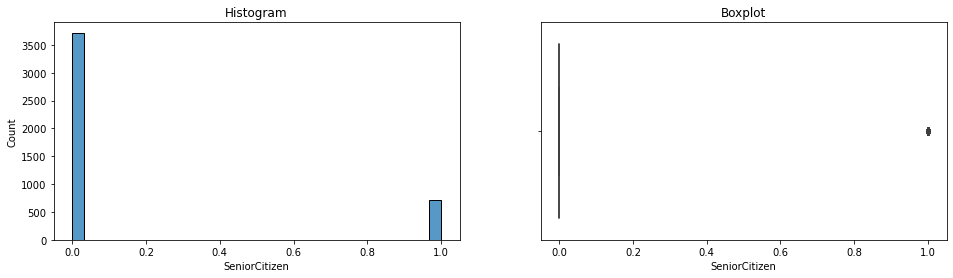


Skewness Value :  1.8478015336818578


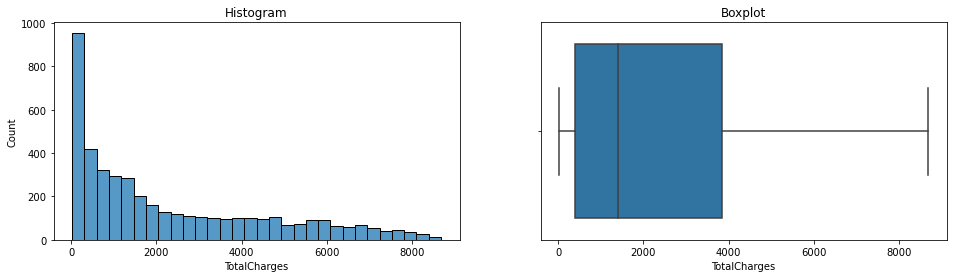


Skewness Value :  0.9500762488418663


In [60]:
# For loop syntax to apply definition above for our numerical features.
for variable in X_train_num1.columns:
    diagnostic_plots(X_train_num1,variable)

Skewness is interpreted as follows:

- 0 to -0.5 or 0 to 0.5  = Normally Distributed
- -0.5 to -1 or 0.5 to 1 = Moderately Skewed
- Below -1 or above 1  = Highly Skewed

With only two numerical features retained, we could undrstand that our feature "SeniorCitizen" is binary. Therefore, we will not be considering the values in it as outliers. For the "TotalCharges" feature, the skewness denotes that it is moderately skewed to the right. However, the boxplots tells us that there are no outliers to speak of. Nevertheless, we will still be conducting outlier handling just in case.

In [61]:
# Handling outlier with capping / censoring.
windsoriser = Winsorizer(capping_method='iqr', tail='both', fold=1.5, # Using fold 3 since features being capped are all heavily skewed.
                          variables=['TotalCharges'])

# Fitting our dataset to the capper / windsorizer.
windsoriser.fit(X_train_num1)

# Transforming dataset and defining into new dataset.
X_train_capped = windsoriser.transform(X_train_num1)

The capping / censoring method of outlier handling is used to preserve the shape / trend of our data.

In [62]:
# Rechecking the skewness of our features after capping.
X_train_capped.skew()

SeniorCitizen    1.847802
TotalCharges     0.950076
dtype: float64

From the results above, we could ascertain that the skewness for both features has not changed. As a reminder, the feature "SeniorCitizen" skipped the outlier handling step. However, the "TotalCharges" has not been skipped. Therefore, we can conclude that "TotalCharges" indeed had no outliers to begin with.

### d. Feature Scaling

Scaling of the numerical features is needed for our model to efficiently and accurately work. Here, we are using the Min-Max scaler, which is a Normalizing technique that will convert the ratio of our values from whichever range they are to only a range of 0 - 1. This scaling method is used because our feature is skewed.

In [63]:
# Defining the features to be scaled.
X_train_num = X_train_capped[['TotalCharges']]
X_train_omit = X_train_capped[['SeniorCitizen']] 

X_test_num = X_test[['TotalCharges']]
X_test_cat = X_test.drop(['SeniorCitizen', 'TotalCharges'], axis=1)
X_test_omit = X_test[['SeniorCitizen']]

X_val_num = X_val[['TotalCharges']]
X_val_cat = X_val.drop(['SeniorCitizen', 'TotalCharges'], axis=1)
X_val_omit = X_val[['SeniorCitizen']]

We will not be scaling the feature "SeniorCitizen."

In [64]:
# Defining scaler.
scaler = MinMaxScaler()

# Fitting features to be scaled. We are only fitting the train set and will be scaling the validation and test set according to it.
scaler.fit(X_train_num)

# Scaling features.
X_train_scaled = scaler.transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)
X_val_scaled = scaler.transform(X_val_num)

# Conversion to dataframe.
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)
X_val_scaled = pd.DataFrame(X_val_scaled)

### e. Feature Encoding

Feature encoding is an important step to convert our non-numerical values into numerical ones, since our model will not be able to interpret the data in its original string form.

In [65]:
# Encoder function to tranform data type string (non-numeric) to numerical form in specific columns
ohe = OneHotEncoder()

# Fitting categorical columns. Again we are only fitting the train set and will be encoding the validation and test set according to it.
ohe.fit(X_train_cat)

# Transforming categorical columns.
X_train_encoded = ohe.transform(X_train_cat).toarray()
X_test_encoded = ohe.transform(X_test_cat).toarray()
X_val_encoded = ohe.transform(X_val_cat).toarray()

# Conversion to dataframe.
X_train_encoded = pd.DataFrame(X_train_encoded)
X_test_encoded = pd.DataFrame(X_test_encoded)
X_val_encoded = pd.DataFrame(X_val_encoded)

### f. Concat Numerical and Categorical Sets

In [66]:
# The numerical and categorical columns will now be rejoined into one dataframe for train and test set each.
X_train_final = pd.concat([X_train_omit.reset_index(drop=True), X_train_scaled.reset_index(drop=True), X_train_encoded.reset_index(drop=True)],axis=1)
X_test_final = pd.concat([X_test_omit.reset_index(drop=True), X_test_scaled.reset_index(drop=True), X_test_encoded.reset_index(drop=True)],axis=1)
X_val_final = pd.concat([X_val_omit.reset_index(drop=True), X_val_scaled.reset_index(drop=True), X_val_encoded.reset_index(drop=True)],axis=1)

The penultimate step in our data preprocessing is to join together the numerical and categorical sets that we have split in step C. The reason for converting our scaled and encoded data into dataframes is apparent here, as that is the required form in which to join (or concat) our data.

### g. Class Balancing

It is required for our dataset class output to be balanced to reduce errors and poor model predictions. As such, we will be oversampling our Minority class (Class 1 / Output "Yes") and synthesize new data samples so that it may have the same sample size as our Majority class (Class 0 / Output "No").

Only the Train Set will be balanced in order to preserve the trend of the validation and test data. This is done so that we will be given genuine predictions from our model that will not impede its performance during deployment.

In [67]:
# Defining the balancer SMOTENC, which is used to oversample minority classes in datasets containing numerical and categorical
smotenc = SMOTENC([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], random_state = 20)

In [68]:
# Fitting and resampling dataset.
X_train_bal, y_train_bal = smotenc.fit_resample(X_train_final, y_train)

Class Balance:  0    1549
1     561
Name: Churn, dtype: int64


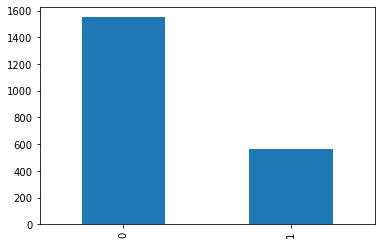

In [74]:
# Before balancing.
y_test.value_counts().plot(kind='bar')
print("Class Balance: ", y_test.value_counts())

In [76]:
print(561/(1549+561)*100, '%')

26.587677725118485 %


Class Balance:  0    358
1    135
Name: Churn, dtype: int64


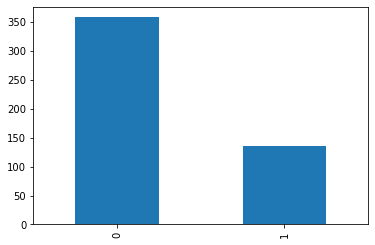

In [75]:
# Before balancing.
y_val.value_counts().plot(kind='bar')
print("Class Balance: ", y_val.value_counts())

In [77]:
print(135/(358+135)*100, '%')

27.38336713995943 %


Class Balance:  0    3256
1    1173
Name: Churn, dtype: int64


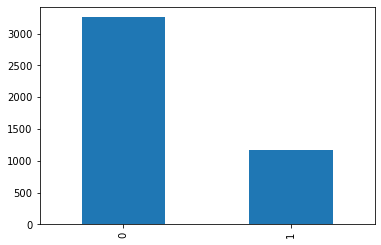

In [69]:
# Before balancing.
y_train.value_counts().plot(kind='bar')
print("Class Balance: ", y_train.value_counts())

Class Balance:  0    3256
1    3256
Name: Churn, dtype: int64


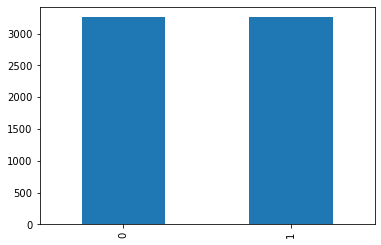

In [70]:
# After balancing.
y_train_bal.value_counts().plot(kind='bar')
print("Class Balance: ", y_train_bal.value_counts())

We can confirm that our dataset is now balanced, class wise, with each target output at 3256 entries each.

### h. TensorFlow Pipeline

In [1354]:
# Defining pipeline for train set.
train_ann = tf.data.Dataset.from_tensor_slices((X_train_bal, y_train_bal))

# Shuffle and batching train set.
train_ann = train_ann.shuffle(buffer_size=128).batch(128)

# Defining Pipeline for test set.
test_ann = tf.data.Dataset.from_tensor_slices((X_test_final, y_test))
test_ann = test_ann.batch(32)

# Defining Pipeline for validation set.
val_ann = tf.data.Dataset.from_tensor_slices((X_val_final, y_val))
val_ann = val_ann.batch(32)

In [1355]:
# Using autotune to allow pipeline to choose optimal buffer size.
AUTOTUNE = tf.data.AUTOTUNE
train_ann = train_ann.cache().prefetch(buffer_size=AUTOTUNE)

## VI. Model Definition

In [1536]:
# Defining number of neurons in the input, hidden, and output layers.
alp = 10
inp = X_train_bal.shape[1]
out = 1
hid = int(len(X_train_bal)/(alp*(inp+out)))
print(f'Number of Neurons in Input Layer : {inp}')
print(f'Number of Neurons in Hidden Layer : {hid}')
print(f'Number of Neurons in Output Layer : {out}')

Number of Neurons in Input Layer : 36
Number of Neurons in Hidden Layer : 17
Number of Neurons in Output Layer : 1


### a. Sequential API

In [1359]:
# Defining Sequential API model architecture.
model_seq = tf.keras.models.Sequential()
model_seq.add(tf.keras.layers.Dense(inp, activation='relu', kernel_initializer='HeNormal', kernel_regularizer='l2', input_shape=(X_train_bal.shape[1],))) # Input Layer
model_seq.add(tf.keras.layers.Dense(hid, activation='relu')) # Hidden Layer
model_seq.add(tf.keras.layers.Dense(out, activation='sigmoid')) # Output Layer

In [1360]:
# Summarizing the Sequential API model.
model_seq.summary()

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_285 (Dense)           (None, 36)                1332      
                                                                 
 dense_286 (Dense)           (None, 17)                629       
                                                                 
 dense_287 (Dense)           (None, 1)                 18        
                                                                 
Total params: 1,979
Trainable params: 1,979
Non-trainable params: 0
_________________________________________________________________


In [1361]:
# Compiling Sequential API model before training. This used to configure the training parameters.
model_seq.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

### b. Functional API

In [1362]:
# Defining Functional API model architecture. 
def get_uncompiled_model():
    input_func = tf.keras.Input(shape=(36,), name='input_func')
    input_func = tf.keras.layers.Dense(36, activation='relu', kernel_initializer='HeNormal', kernel_regularizer='l2')(input_func)
    hidden_func = tf.keras.layers.Dense(17, activation='relu', name='hidden_layer_func')(input_func)
    output_func = tf.keras.layers.Dense(1, activation='sigmoid', name='output_func')(hidden_func)
    model_func = tf.keras.Model(inputs=input_func, outputs=output_func)
    return model_func

# Compiling Functional API model before training.
def get_compiled_model():
    model_func = get_uncompiled_model()
    model_func.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'],)
    return model_func

## VII. Model Training

### a. Sequential API

In [1363]:
# Training Sequential API model.
history_seq = model_seq.fit(train_ann, epochs=50, batch_size=32, validation_data=(val_ann))

# Evaluating model.
print("\nEvaluate on test data")
result_seq = model_seq.evaluate(test_ann)

Epoch 1/50
51/51 [==============================] - 1s 8ms/step - loss: 1.3265 - accuracy: 0.5494 - val_loss: 1.2078 - val_accuracy: 0.6085
Epoch 2/50
51/51 [==============================] - 0s 5ms/step - loss: 1.1429 - accuracy: 0.6628 - val_loss: 1.0240 - val_accuracy: 0.7160
Epoch 3/50
51/51 [==============================] - 0s 5ms/step - loss: 0.9901 - accuracy: 0.7256 - val_loss: 0.9202 - val_accuracy: 0.7262
Epoch 4/50
51/51 [==============================] - 0s 4ms/step - loss: 0.8960 - accuracy: 0.7363 - val_loss: 0.8391 - val_accuracy: 0.7343
Epoch 5/50
51/51 [==============================] - 0s 4ms/step - loss: 0.8221 - accuracy: 0.7459 - val_loss: 0.7842 - val_accuracy: 0.7343
Epoch 6/50
51/51 [==============================] - 0s 4ms/step - loss: 0.7697 - accuracy: 0.7486 - val_loss: 0.7393 - val_accuracy: 0.7383
Epoch 7/50
51/51 [==============================] - 0s 4ms/step - loss: 0.7269 - accuracy: 0.7494 - val_loss: 0.7112 - val_accuracy: 0.7404
Epoch 8/50
51/51 [==

### b. Functional API

In [1364]:
# Defining the compiled Functional API model.
model_func = get_compiled_model()

# Training the model.
history_func = model_func.fit(train_ann, epochs=50, batch_size=32, validation_data=(val_ann))

# Evaluating model.
print("\nEvaluate on test data")
result_func = model_func.evaluate(test_ann)

Epoch 1/50
51/51 [==============================] - 1s 7ms/step - loss: 0.6402 - accuracy: 0.6215 - val_loss: 0.5527 - val_accuracy: 0.7363
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: 0.5671 - accuracy: 0.7202 - val_loss: 0.5406 - val_accuracy: 0.7424
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: 0.5465 - accuracy: 0.7354 - val_loss: 0.5259 - val_accuracy: 0.7566
Epoch 4/50
51/51 [==============================] - 0s 3ms/step - loss: 0.5326 - accuracy: 0.7465 - val_loss: 0.5201 - val_accuracy: 0.7586
Epoch 5/50
51/51 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.7502 - val_loss: 0.5168 - val_accuracy: 0.7566
Epoch 6/50
51/51 [==============================] - 0s 4ms/step - loss: 0.5181 - accuracy: 0.7537 - val_loss: 0.5147 - val_accuracy: 0.7525
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: 0.5136 - accuracy: 0.7554 - val_loss: 0.5136 - val_accuracy: 0.7525
Epoch 8/50
51/51 [==

## VIII. Model Evaluation

### a. Sequential API

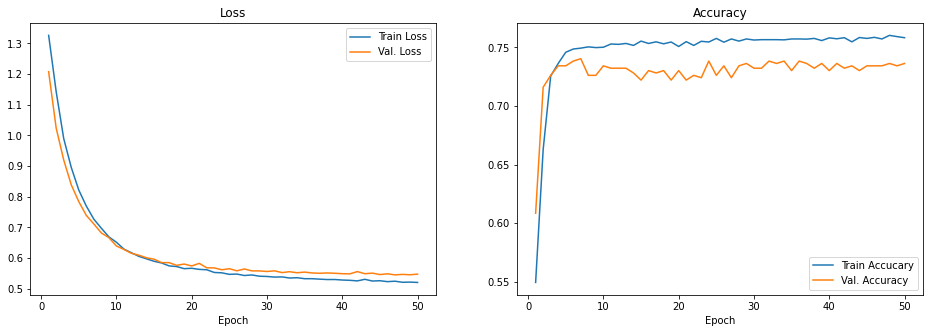

In [1365]:
# Visualizing Model Evaluation for Sequential API.
epoch=50

# Train and Validation set loss.
fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_seq.history['loss'],label='Train Loss')
ax[0].plot(range(1,epoch+1),history_seq.history['val_loss'],label='Val. Loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

# Train and Validation set accuracy.
ax[1].plot(range(1,epoch+1),history_seq.history['accuracy'],label='Train Accucary')
ax[1].plot(range(1,epoch+1),history_seq.history['val_accuracy'],label='Val. Accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

The model here is deemed to be just-fit, although the validation accuracy is close to having a minor exploding gradient problem.

66/66 [==============================] - 0s 1ms/step
[[1064  485]
 [ 107  454]]


<AxesSubplot:>

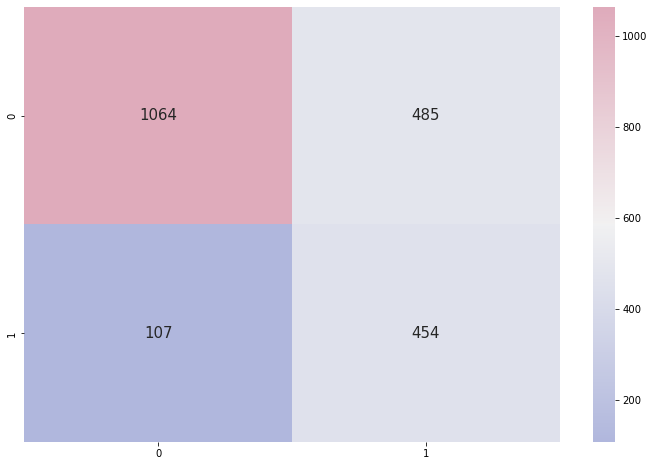

In [1366]:
# Defining the probability of where our predicted outcome will land on (No or Yes). 
y_pred_seq = model_seq.predict(X_test_final)
# Positive / Yes outcome is defined as value of above 0.5.
y_pred_seq = (y_pred_seq > 0.5)

# Display Confusion Matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix_seq = confusion_matrix(y_test, y_pred_seq)
print(cf_matrix_seq)
sns.heatmap(cf_matrix_seq, cmap = cmap1, annot = True, annot_kws = {'size':15}, fmt='g')

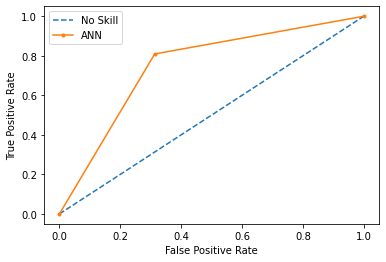

AUC score: 0.7480819665151113


In [1367]:
# ROC-AUC score calculation.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_seq)
auc = roc_auc_score(y_test,y_pred_seq)

# Plotting the ROC-AUC curve.
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

Reference: https://bit.ly/3CcMkKh

Here, with an AUC score of 0.748 / 74.8%, our model is capable of accurately distinguishing between classes.

In [1368]:
# Displaying Validation and Test set Loss and Accuracy scores.
val_results_seq = model_seq.evaluate(X_test_final, y_test, verbose=0)
print(f'Validation Loss - Sequential API : {val_results_seq[0]:.4f}')
print(f'Validation Accuracy - Sequential API : {val_results_seq[1]:.4f}')
print('')
print('Test Loss - Sequential API : ', result_seq[0])
print('Test Accuracy - Sequential API : ', result_seq[1])

Validation Loss - Sequential API : 0.5616
Validation Accuracy - Sequential API : 0.7194

Test Loss - Sequential API :  0.5615819096565247
Test Accuracy - Sequential API :  0.7194312810897827


In [1369]:
# Displaying Classification report for prediction of Sequential API model.
print(classification_report(y_test, y_pred_seq))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1549
           1       0.48      0.81      0.61       561

    accuracy                           0.72      2110
   macro avg       0.70      0.75      0.69      2110
weighted avg       0.80      0.72      0.74      2110



For the classification report, we will be looking at the Recall since we are aiming to avoid the following problems:

- Problem 1 = Model predicts customers WILL CHURN when in fact they WILL NOT.
- Problem 2 = Model predicts customers WILL NOT CHURN when in fact they WILL.

Therefore, the recall scores are defined as the following: 

- Recall Class 0 = Where False Negative means that model predicts customers will CHURN when in fact they would NOT.
- Recall Class 1 = Where False Negative means that model predicts customers will NOT CHURN when in fact they WILL.

Additional attribute we will be looking for is:

- Accuracy = The ratio of correctly predicted observation to the total observations.

*We will only be looking at our Test Set for the evaluation.

Sequential API ANN Model Overview:

- Class 0 Recall is 0.69 / 69%
- Class 1 Recall is 0.81 / 81%
- Accuracy is 0.72 / 72%

Summary:

Class 0's recall score indicates to us that the model is 69% accurate at classifying that customers WILL NOT churn. This means that 31% of the time, we may get a situation where we provide more benefits for a customer that will actually not be churning, wasting our resources. However, these consequences are relatively minimal.

For Class 1, the recall is at 81%, which would indicate that our model is good at accurately classifying that customers WILL churn. With it, there is a good chance that we can react accordingly and in a timely manner to avoid a customer churning.

### b. Functional API

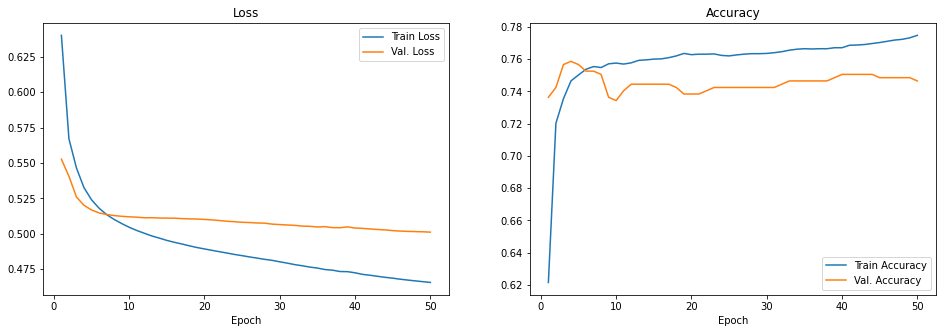

In [1370]:
# Visualizing Model Evaluation for Functional API.
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_func.history['loss'],label='Train Loss')
ax[0].plot(range(1,epoch+1),history_func.history['val_loss'],label='Val. Loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history_func.history['accuracy'],label='Train Accuracy')
ax[1].plot(range(1,epoch+1),history_func.history['val_accuracy'],label='Val. Accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

The model here is overfit due to the divergence in the Train and Validation loss.

66/66 [==============================] - 0s 1ms/step
[[1130  419]
 [ 124  437]]


<AxesSubplot:>

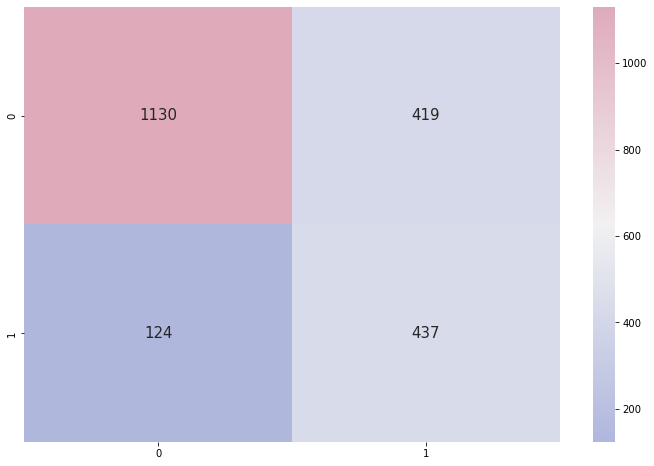

In [1371]:
# predict probabilities
y_pred_func = model_func.predict(X_test_final)
# keep probabilities for the positive outcome only
y_pred_func = (y_pred_func > 0.5)

# confusion matrix
cmap2 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix_func = confusion_matrix(y_test, y_pred_func)
print(cf_matrix_func)
##persentase
# sns.heatmap(cf_matrix_func/np.sum(cf_matrix_func), cmap = cmap1, annot = True, annot_kws = {'size':15});
sns.heatmap(cf_matrix_func, cmap = cmap2, annot = True, annot_kws = {'size':15}, fmt='g')

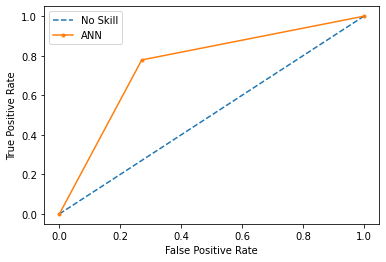

AUC score: 0.7542345185036864


In [1372]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_func)
auc = roc_auc_score(y_test,y_pred_func)

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

Here, with an AUC score of 0.754 / 75.4%, our model is good at accurately distinguishing between classes.

In [1373]:
val_results_func = model_func.evaluate(X_test_final, y_test, verbose=0)
print(f'Validation Loss - Functional API : {val_results_func[0]:.4f}')
print(f'Validation Accuracy - Functional API : {val_results_func[1]:.4f}')
print('')
print('Test Loss - Functional API : ', result_func[0])
print('Test Accuracy - Functional API : ', result_func[1])

Validation Loss - Functional API : 0.5101
Validation Accuracy - Functional API : 0.7427

Test Loss - Functional API :  0.510115385055542
Test Accuracy - Functional API :  0.742654025554657


In [1374]:
# Displaying Classification report for prediction of Functional API model.
print(classification_report(y_test, y_pred_func))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1549
           1       0.51      0.78      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.75      0.71      2110
weighted avg       0.80      0.74      0.76      2110



Functional API ANN Model Overview:

- Class 0 Recall is 0.73 / 73%
- Class 1 Recall is 0.78 / 78%
- Accuracy is 0.74 / 74%

Summary:

Class 0's recall score indicates to us that the model is 73% accurate at classifying that customers WILL NOT churn. This means that 27% of the time, we may get a situation where we provide more benefits for a customer that will actually not be churning, wasting our resources. However, these consequences are relatively minimal.

For Class 1, the recall is at 78%, which would indicate that our model is decent at accurately classifying that customers WILL churn. With it, there is a good chance that we can react accordingly and in a timely manner to avoid a customer churning.

## IX. Model Improvement

In [1486]:
# Defining number of neurons in the input, hidden, and output layers for improved Sequential API model.
alp = 10
inp = X_train_bal.shape[1]
out = 1
hid = int(len(X_train_bal)/(alp*(inp+out)))
print(f'Jumlah Neuron pada Hidden Layer: {hid}')

Jumlah Neuron pada Hidden Layer: 17


### a. Sequential API

#### 1. Model Definition

In [1523]:
# Defining improved Sequential API model architecture.
model_seq2 = tf.keras.models.Sequential()
model_seq2.add(tf.keras.layers.Dense(inp, activation='relu', kernel_initializer='HeNormal', kernel_regularizer='l2', input_shape=(X_train_bal.shape[1],))) # Input Layer
model_seq2.add(tf.keras.layers.Dense(hid, activation='relu')) # Hidden Layer
model_seq2.add(tf.keras.layers.Dense(out, activation='sigmoid')) # Output Layer

In [1524]:
model_seq2.summary()

Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_324 (Dense)           (None, 36)                1332      
                                                                 
 dense_325 (Dense)           (None, 17)                629       
                                                                 
 dense_326 (Dense)           (None, 1)                 18        
                                                                 
Total params: 1,979
Trainable params: 1,979
Non-trainable params: 0
_________________________________________________________________


In [1525]:
# Compiling / setting training parameters for improved Sequential API model.
model_seq2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adamax(clipvalue=0.1, learning_rate=0.001), metrics='accuracy')

#### 2. Model Training

In [1526]:
# Training improved Sequential API model.
history_seq2 = model_seq2.fit(train_seq, epochs=20, batch_size=32, validation_data=(val_seq))

print("\nEvaluate on test data")
result_seq2 = model_seq2.evaluate(test_seq)

Epoch 1/20
51/51 [==============================] - 1s 5ms/step - loss: 1.3675 - accuracy: 0.5275 - val_loss: 1.1750 - val_accuracy: 0.7383
Epoch 2/20
51/51 [==============================] - 0s 3ms/step - loss: 1.1902 - accuracy: 0.6766 - val_loss: 1.1048 - val_accuracy: 0.7302
Epoch 3/20
51/51 [==============================] - 0s 3ms/step - loss: 1.0997 - accuracy: 0.7016 - val_loss: 1.0352 - val_accuracy: 0.7120
Epoch 4/20
51/51 [==============================] - 0s 2ms/step - loss: 1.0275 - accuracy: 0.7176 - val_loss: 0.9733 - val_accuracy: 0.7160
Epoch 5/20
51/51 [==============================] - 0s 3ms/step - loss: 0.9680 - accuracy: 0.7259 - val_loss: 0.9210 - val_accuracy: 0.7160
Epoch 6/20
51/51 [==============================] - 0s 2ms/step - loss: 0.9187 - accuracy: 0.7359 - val_loss: 0.8772 - val_accuracy: 0.7160
Epoch 7/20
51/51 [==============================] - 0s 2ms/step - loss: 0.8776 - accuracy: 0.7419 - val_loss: 0.8398 - val_accuracy: 0.7140
Epoch 8/20
51/51 [==

In [1527]:
# Freezing improved Sequential API model to prevent further training beyond this point.
model_seq2.trainable = False

#### 3. Model Evaluation

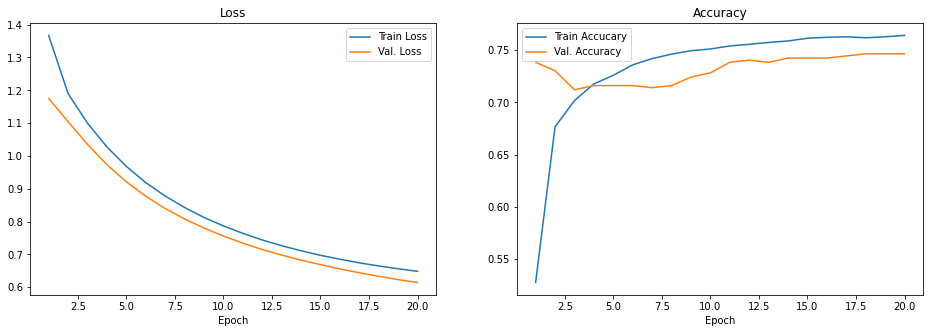

In [1528]:
# Visualizing Model Evaluation for improved Sequential API model.
epoch=20

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_seq2.history['loss'],label='Train Loss')
ax[0].plot(range(1,epoch+1),history_seq2.history['val_loss'],label='Val. Loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history_seq2.history['accuracy'],label='Train Accucary')
ax[1].plot(range(1,epoch+1),history_seq2.history['val_accuracy'],label='Val. Accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

The model remains just-fit.

66/66 [==============================] - 0s 1ms/step
[[1086  463]
 [ 112  449]]


<AxesSubplot:>

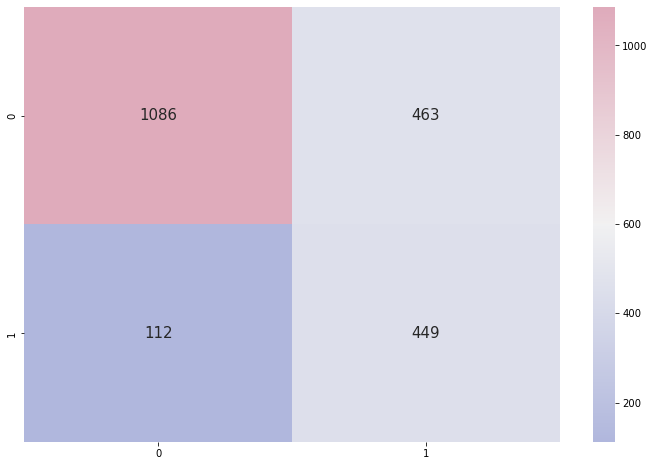

In [1529]:
y_pred_seq2 = model_seq2.predict(X_test_final)
y_pred_seq2 = (y_pred_seq2 > 0.5)

cmap3 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix_seq2 = confusion_matrix(y_test, y_pred_seq2)
print(cf_matrix_seq2)
sns.heatmap(cf_matrix_seq2, cmap = cmap3, annot = True, annot_kws = {'size':15}, fmt='g')

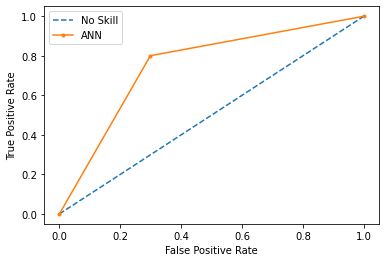

AUC score: 0.7507269942427349


In [1530]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_seq2)
auc = roc_auc_score(y_test,y_pred_seq2)

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

The AUC score of the improved Sequential API ANN model is 0.75 / 75%. This means our model is good at accurately distinguishing between classes.

In [1531]:
val_results_seq2 = model_seq2.evaluate(X_test_final, y_test, verbose=0)
print(f'Validation Loss - Sequential API (Improved) : {val_results_seq2[0]:.4f}')
print(f'Validation Accuracy - Sequential API (Improved) : {val_results_seq2[1]:.4f}')
print('')
print('Test Loss - Sequential API (Improved) : ', result_seq2[0])
print('Test Accuracy - Sequential API (Improved) : ', result_seq2[1])

Validation Loss - Sequential API (Improved) : 0.6276
Validation Accuracy - Sequential API (Improved) : 0.7275

Test Loss - Sequential API (Improved) :  0.6276043653488159
Test Accuracy - Sequential API (Improved) :  0.7274881601333618


In [1532]:
# Displaying Classification report for prediction of improved Sequential API model.
print(classification_report(y_test, y_pred_seq2))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1549
           1       0.49      0.80      0.61       561

    accuracy                           0.73      2110
   macro avg       0.70      0.75      0.70      2110
weighted avg       0.80      0.73      0.74      2110



Improved Sequential API ANN Model Overview:

- Class 0 Recall is 0.70 / 70%
- Class 1 Recall is 0.80 / 80%
- Accuracy is 0.73 / 73%

Summary:

Class 0's recall score indicates to us that the model is 70% accurate at classifying that customers WILL NOT churn. This means that 30% of the time, we may get a situation where we provide more benefits for a customer that will actually not be churning, wasting our resources. However, these consequences are relatively minimal.

For Class 1, the recall is at 80%, which would indicate that our model is good at accurately classifying that customers WILL churn. With it, there is a good chance that we can react accordingly and in a timely manner to avoid a customer churning.

### b. Functional API

#### 1. Model Definition

In [1500]:
# Defining improved Functional API model architecture. 
def get_uncompiled_model():
    input_func2 = tf.keras.Input(shape=(36,), name='input_func2')
    input_func2 = tf.keras.layers.Dense(36, activation='relu', kernel_initializer='HeNormal', kernel_regularizer='l2')(input_func2)
    hidden_func2 = tf.keras.layers.Dense(17, activation='relu', name='hidden_layer_func')(input_func2)
    output_func2 = tf.keras.layers.Dense(1, activation='sigmoid', name='output_func')(hidden_func2)
    model_func2 = tf.keras.Model(inputs=input_func2, outputs=output_func2)
    return model_func2

# Compiling improved Functional API model before training.
def get_compiled_model():
    model_func2 = get_uncompiled_model()
    model_func2.compile(optimizer=tf.keras.optimizers.Adamax(clipvalue=0.1, learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'],)
    return model_func2

#### 2. Model Training

In [1502]:
# Defining the compiled Functional API model.
model_func2 = get_compiled_model()

# Training the model.
history_func2 = model_func2.fit(train_func, epochs=20, batch_size=32, validation_data=(X_val_final, y_val))

# Evaluating model.
print("\nEvaluate on test data")
result_func2 = model_func2.evaluate(test_func)

Epoch 1/20
51/51 [==============================] - 1s 9ms/step - loss: 0.7575 - accuracy: 0.4559 - val_loss: 0.6220 - val_accuracy: 0.6673
Epoch 2/20
51/51 [==============================] - 0s 4ms/step - loss: 0.6561 - accuracy: 0.6090 - val_loss: 0.5933 - val_accuracy: 0.6978
Epoch 3/20
51/51 [==============================] - 0s 3ms/step - loss: 0.6125 - accuracy: 0.6754 - val_loss: 0.5719 - val_accuracy: 0.7241
Epoch 4/20
51/51 [==============================] - 0s 3ms/step - loss: 0.5857 - accuracy: 0.6984 - val_loss: 0.5538 - val_accuracy: 0.7282
Epoch 5/20
51/51 [==============================] - 0s 3ms/step - loss: 0.5671 - accuracy: 0.7156 - val_loss: 0.5381 - val_accuracy: 0.7485
Epoch 6/20
51/51 [==============================] - 0s 4ms/step - loss: 0.5530 - accuracy: 0.7288 - val_loss: 0.5255 - val_accuracy: 0.7546
Epoch 7/20
51/51 [==============================] - 0s 3ms/step - loss: 0.5422 - accuracy: 0.7402 - val_loss: 0.5153 - val_accuracy: 0.7546
Epoch 8/20
51/51 [==

In [1503]:
model_func2.trainable = False

#### 3. Model Evaluation

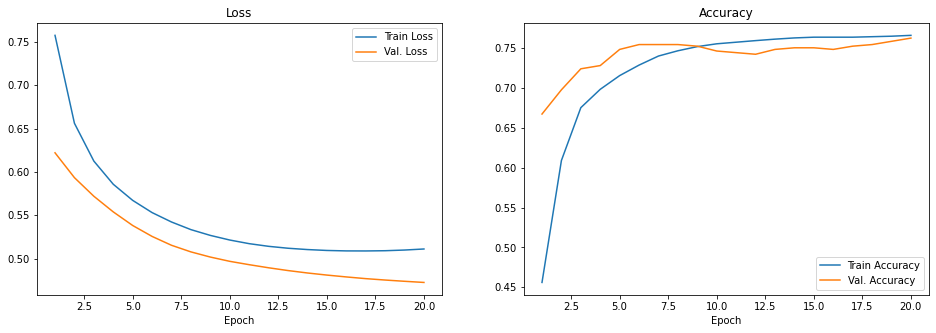

In [1504]:
# Visualizing Model Evaluation for improved Functional API model.
epoch=20

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_func2.history['loss'],label='Train Loss')
ax[0].plot(range(1,epoch+1),history_func2.history['val_loss'],label='Val. Loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history_func2.history['accuracy'],label='Train Accuracy')
ax[1].plot(range(1,epoch+1),history_func2.history['val_accuracy'],label='Val. Accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

After tuning the parameters, we now obtain a model that is just-fit.

66/66 [==============================] - 0s 2ms/step
[[1130  419]
 [ 124  437]]


<AxesSubplot:>

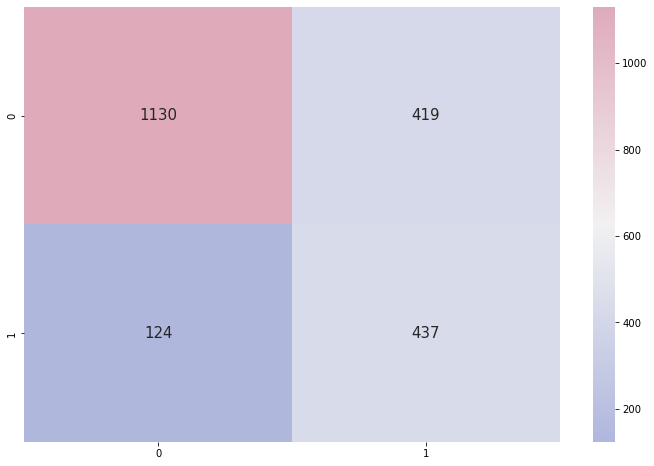

In [1505]:
y_pred_func2 = model_func2.predict(X_test_final)
y_pred_func2 = (y_pred_func2 > 0.5)

cmap4 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix_func2 = confusion_matrix(y_test, y_pred_func)
print(cf_matrix_func2)
sns.heatmap(cf_matrix_func, cmap = cmap4, annot = True, annot_kws = {'size':15}, fmt='g')

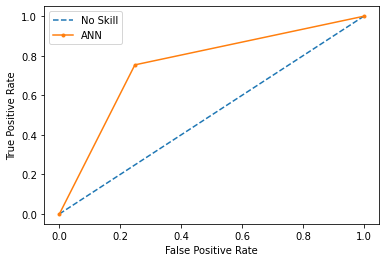

AUC score: 0.7530544115057842


In [1506]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_func2)
auc = roc_auc_score(y_test,y_pred_func2)

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

The AUC score of the improved Functional API ANN model is 0.753 / 75.3%. This means our model is good at accurately distinguishing between classes.

In [1507]:
val_results_func2 = model_func2.evaluate(X_test_final, y_test, verbose=0)
print(f'Validation Loss - Functional API (Function) : {val_results_func2[0]:.4f}')
print(f'Validation Accuracy - Functional API (Function) : {val_results_func2[1]:.4f}')
print('')
print('Test Loss - Functional API (Function) : ', result_func2[0])
print('Test Accuracy - Functional API (Function) : ', result_func2[1])

Validation Loss - Functional API (Function) : 0.4817
Validation Accuracy - Functional API (Function) : 0.7526

Test Loss - Functional API (Function) :  0.48166272044181824
Test Accuracy - Functional API (Function) :  0.7527146339416504


In [1508]:
# Displaying Classification report for prediction of improved Functional API model.
print(classification_report(y_test, y_pred_func2))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1549
           1       0.52      0.75      0.62       561

    accuracy                           0.75      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.80      0.75      0.76      2110



Improved Sequential API ANN Model Overview:

- Class 0 Recall is 0.75 / 75%
- Class 1 Recall is 0.75 / 75%
- Accuracy is 0.75 / 75%

Summary:

Class 0's recall score indicates to us that the model is 75% accurate at classifying that customers WILL NOT churn. This means that 25% of the time, we may get a situation where we provide more benefits for a customer that will actually not be churning, wasting our resources. However, these consequences are relatively minimal.

For Class 1, the recall is at 75%, which would indicate that our model is decent at accurately classifying that customers WILL churn. With it, there is a good chance that we can react accordingly and in a timely manner to avoid a customer churning.

## X. Model Inference

In [1535]:
# Create Inference Data
df_inf = pd.DataFrame([[0, 'No', 'No', 'DSL', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 2280],
[1, 'No', 'Yes', 'Fiber optic', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Two year', 'Yes', 'Credit card (automatic)', 3900],
[1, 'Yes', 'No', 'No', 'No internet service', 'No internet service', 'No internet service', 'No internet service', 'No internet service',
'No internet service', 'Month-to-month', 'No', 'Bank transfer (automatic)', 60],
[0, 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 8000],
[0, 'No', 'No', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Two year', 'Yes', 'Credit card (automatic)', 5500]],
     
     columns=['SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'])

df_inf

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,0,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,2280
1,1,No,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),3900
2,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),60
3,0,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,8000
4,0,No,No,Fiber optic,Yes,Yes,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),5500


In [1540]:
# Pipeline for Data Preprocessing for deployment app.
inf_num = X_train_num1.columns.values
inf_cat = X_train_cat.columns.values
scaler_pipe = Pipeline([('Scaled', scaler)])
encoder_pipe = Pipeline([('Encoded', ohe)])

preproc_pipe = ColumnTransformer(transformers=[('Numerical', scaler_pipe, inf_num), ('Categorical', encoder_pipe, inf_cat)])

preproc_pipe.fit(X_train)

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('Scaled', MinMaxScaler())]),
                                 array(['SeniorCitizen', 'TotalCharges'], dtype=object)),
                                ('Categorical',
                                 Pipeline(steps=[('Encoded', OneHotEncoder())]),
                                 array(['Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype=object))])

In [1541]:
# Transform inference dataset.
df_inf_final = preproc_pipe.transform(df_inf)

In [1542]:
# Predicting inference dataset outcome for target "Churn."
pred_inf = model_func2.predict(df_inf_final)
pred_inf = pd.DataFrame(np.round_(pred_inf), columns=['Churn'])
pred_inf

1/1 [==============================] - 0s 69ms/step


,Churn
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


In [1543]:
# Concat to display final table of features with predicted target outcome.
pd.concat([df_inf, pred_inf], axis=1)

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,2280,0.0
1,1,No,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),3900,0.0
2,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),60,0.0
3,0,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,8000,1.0
4,0,No,No,Fiber optic,Yes,Yes,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),5500,0.0


## XI. Model Saving

In [1544]:
# Saving Data Preprocessing Pipeline
pickle.dump(preproc_pipe, open('proc_pipe_ml1_p2.pkl', 'wb'))

In [1545]:
# Saving ANN model
model_func2.save('ml1_p2_model.h5')

## XII. Conclusion

To recall, the objective of this notebook is to create a Artificial Neural Network (ANN) model in which the model could predict whether or not a customer will churn from the Telco services.

To summarize, Class 0 (No) means customers will not churn, whilst Class 1 (Yes) means customers will churn. As such, we are looking to avoid two error types:

- Type 1: Class 0 Recall = The higher this percentage is, the less likely the model will incorrectly predict customers WILL CHURN when in fact they WILL NOT.
- Type 2: Class 1 Recall = The higher this percentage is, the less likely the model will incorrectly predict customers WILL NOT CHURN when in fact they WILL.

Only Test Sets are used for the evaluation. 

The second type of error has more severe consequences than the first type. In a condition where Recall for Class 1 is poor, we may be more susceptible to letting customers churn without prior notice, reducing our customer number and therefore potentially reducing income. On the other hand, in a condition where Recall for Class 0 is poor, we may be more to accidentally giving more benefits to customers that will actually not churn. This may, although minimal, burden our resource and create a potential environment in which we focus at the wrong customers, causing further problems down the line. As such, we would want these two recall values to be as close to 100% as possible.

To conclude, this is the results we can gather from our model evaluation:

Sequential API ANN Model -

- Class 0 Recall is 0.69 / 69%
- Class 1 Recall is 0.81 / 81%
- AUC Score is 0.748 / 74.8%
- Accuracy is 0.72 / 72%
- Model is just-fit

Functional API ANN Model -

- Class 0 Recall is 0.73 / 73%
- Class 1 Recall is 0.78 / 78%
- AUC Score is 0.754 / 75.4%
- Accuracy is 0.74 / 74%
- Model is just-fit

Tuning our models using the following steps:

For Sequential API - Changing optimizer to Adamax, adding clipvalue=0.1, learning_rate=0.001, and changing epoch from 50 to 20.

For Functional API - Changing optimizer to Adamax, adding clipvalue=0.1, learning_rate=0.001, and changing epoch from 50 to 20.

We obtain results of:

Sequential API ANN Model (Improved) -

- Class 0 Recall is 0.70 / 70%
- Class 1 Recall is 0.80 / 80%
- AUC Score is 0.75 / 75%
- Accuracy is 0.73 / 73%
- Model is just-fit

Functional API ANN Model (Improved) -

- Class 0 Recall is 0.75 / 75%
- Class 1 Recall is 0.75 / 75%
- AUC Score is 0.753 / 75.3%
- Accuracy is 0.75 / 75%
- Model is just-fit

The improved Functinal API ANN model is best model in terms of Class 1 Recall.